# Business Case: Walmart - Confidence Interval and CLT 

## About Walmart <img src="https://cdn.dribbble.com/userupload/5249948/file/original-af6c722d469e1717d1d130299f33278d.gif" width=20%>

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## 1. Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

##### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as spy
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Observations

**Define count of rows and columns**

In [3]:
df.shape

(550068, 10)

**Datatype of the each column**

In [4]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

#### Conversion of categorical attributes to 'category'

In [6]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [7]:
df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

In [8]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [9]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


### Non-Graphical Analysis

**Unique Attributes**

In [10]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## 2. Visual Analysis

**Perform Visualizations on continuous variable** 

In [11]:
continuous_variable = df['Purchase']

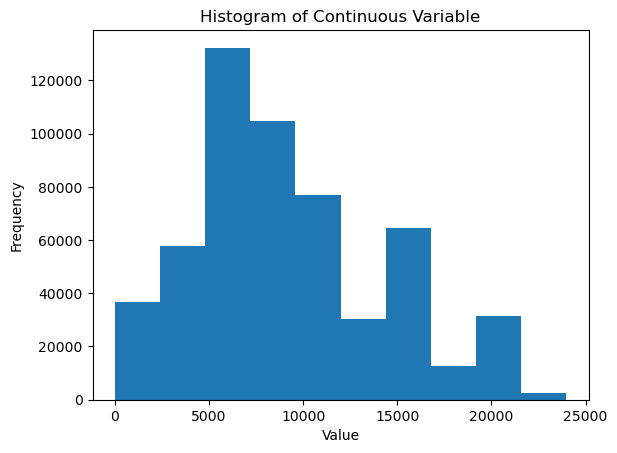

In [12]:
# Histogram for continuous variable(s)
plt.hist(continuous_variable, bins=10)
plt.title('Histogram of Continuous Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

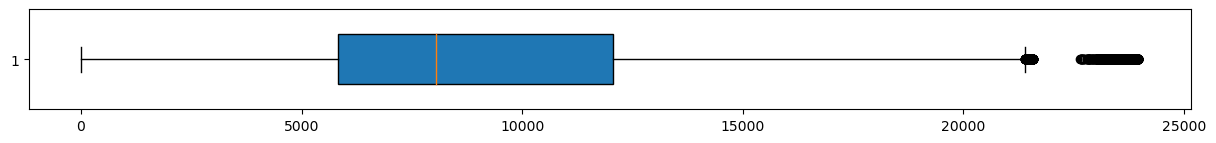

In [13]:
plt.figure(figsize=(15, 10))
boxplot = plt.boxplot(x=df['Purchase'], vert=False, patch_artist=True, widths=0.5)
plt.subplots_adjust(top=0.2, bottom=0.1)
plt.show()

**Insights**

1. Most customers spent around 6,000 and 12,000.
2. This suggests a clustering around these two spending amounts.
3. The typical customer spent around 8,000, but there's a wide range in spending habits.
4. Some customers spent as little as 10, while others spent as much as 20,000.

**Perform Visualizations on categorical variable** 

In [14]:
categorical_variable = df[['Marital_Status' ,'Age', 'City_Category' ,'Stay_In_Current_City_Years']]

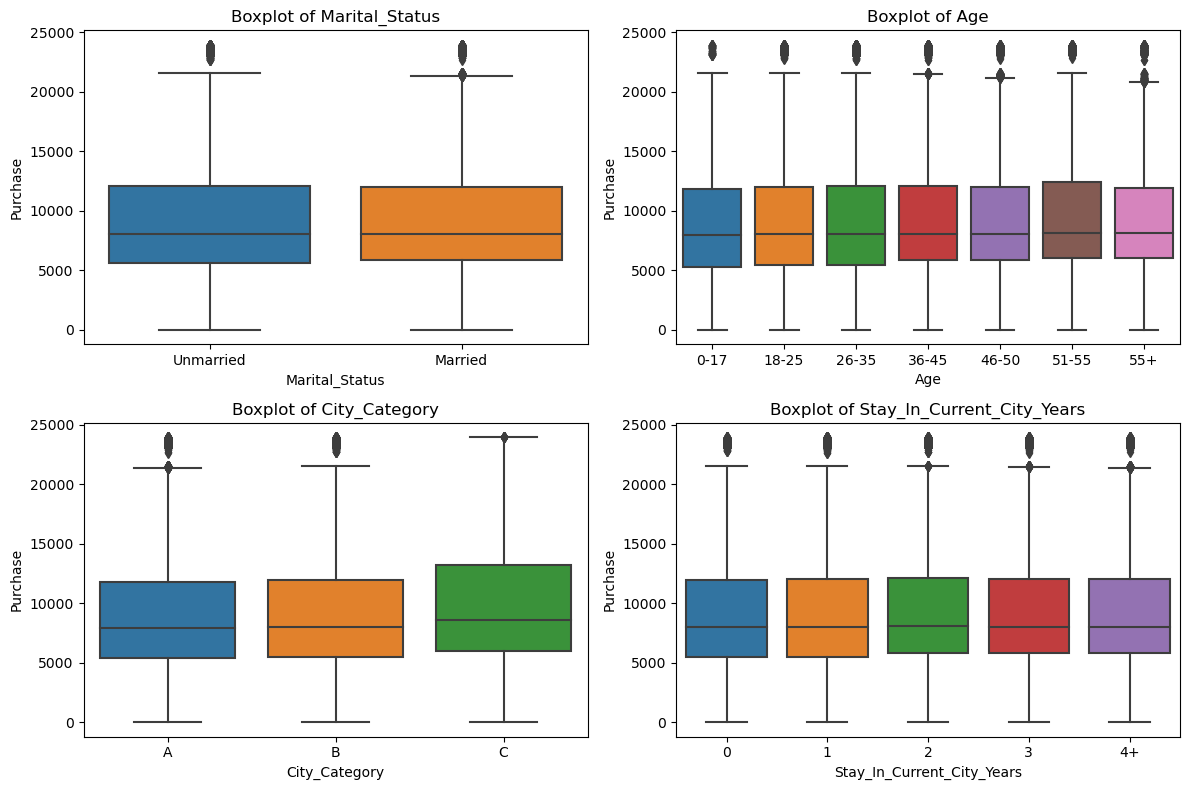

In [15]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_variable.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=column, y='Purchase')  # Assuming 'Purchase' is a continuous variable
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Purchase')
plt.tight_layout()
plt.show()

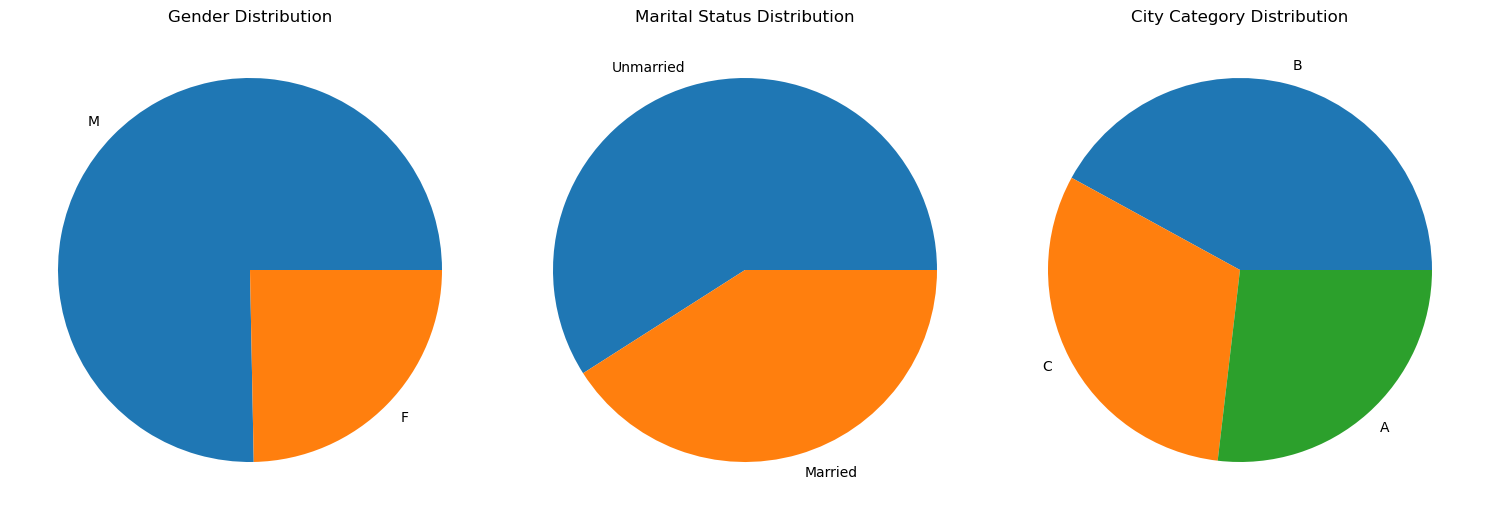

In [16]:
plt.figure(figsize=(15, 12))

# Creating pie chart for gender distribution
plt.subplot(1, 3, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index)
plt.title('Gender Distribution')

# Creating pie chart for marital status
plt.subplot(1, 3, 2)
marital_counts = df['Marital_Status'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index)
plt.title('Marital Status Distribution')

# Creating pie chart for city category
plt.subplot(1, 3, 3)
city_counts = df['City_Category'].value_counts()
plt.pie(city_counts, labels=city_counts.index)
plt.title('City Category Distribution')

plt.tight_layout()
plt.show()


**Insights**

1. Gender Distribution - The data reveals notable variations in purchasing patterns between male and female shoppers throughout the Black Friday event.

2. Marital Status - With unmarried individuals comprising a larger proportion of transactions, targeting tailored marketing strategies or promotions towards this demographic could yield favorable results.

3. City Category - City B emerges as the top performer in terms of transaction volume, trailed by City C and City A in descending order of activity.

## 3. Missing Value & Outlier Detection

**Check for any duplicates in the dataset**

In [17]:
df.duplicated().sum()

0

**Check for any null rows in the dataset**

In [18]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Check for any outliers using Boxplot**

<Axes: xlabel='Purchase'>

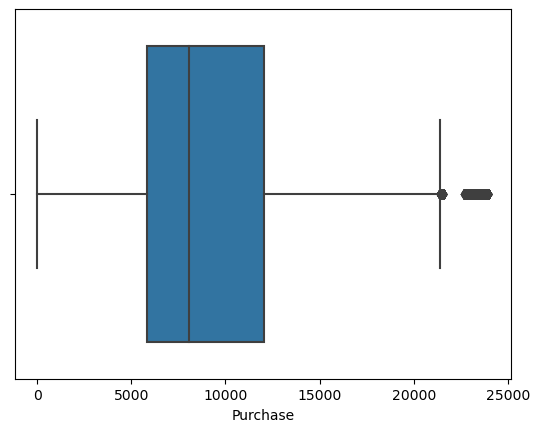

In [19]:
sns.boxplot(x=df['Purchase'], orient='h')

**Check for any outliers using IQR**

In [20]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)).sum()

print("Count of outliers in 'Purchase' column (using IQR method):", outliers_count)


Count of outliers in 'Purchase' column (using IQR method): 2677


In [21]:
2677/550068*100

0.4866671029763593

***We have 2677 outliers out of 550068 in Purchase column which is 0.48% of the total Dataset***
(Keep or Drop as required by the business team)

## 4. Answering questions 

**Analysis Based on Gender**

In [22]:
# Filter data for male and female separately
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

# Calculate mean and standard deviation for male and female groups
mean_male = np.mean(male_data)
std_dev_male = np.std(male_data)
mean_female = np.mean(female_data)
std_dev_female = np.std(female_data)

# Calculate the standard error of the mean for each group (assuming large enough sample sizes)
sem_male = std_dev_male / np.sqrt(len(male_data))
sem_female = std_dev_female / np.sqrt(len(female_data))

# Calculate the confidence intervals for male and female groups
confidence_level = 0.95  # You can change this to the desired confidence level
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)

# Calculate confidence intervals
ci_male = (mean_male - z_score * sem_male, mean_male + z_score * sem_male)
ci_female = (mean_female - z_score * sem_female, mean_female + z_score * sem_female)

print("Mean Purchase (Male):", mean_male)
print("Confidence Interval (Male):", ci_male)
print("Mean Purchase (Female):", mean_female)
print("Confidence Interval (Female):", ci_female)

# Check if confidence intervals overlap
if ci_male[0] > ci_female[1] or ci_female[0] > ci_male[1]:
    print("The confidence intervals do not overlap, so there may be a significant difference.")
else:
    print("The confidence intervals overlap, so there may not be a significant difference.")


Mean Purchase (Male): 9437.526040472265
Confidence Interval (Male): (9422.019466078644, 9453.032614865886)
Mean Purchase (Female): 8734.565765155476
Confidence Interval (Female): (8709.211640485983, 8759.919889824969)
The confidence intervals do not overlap, so there may be a significant difference.


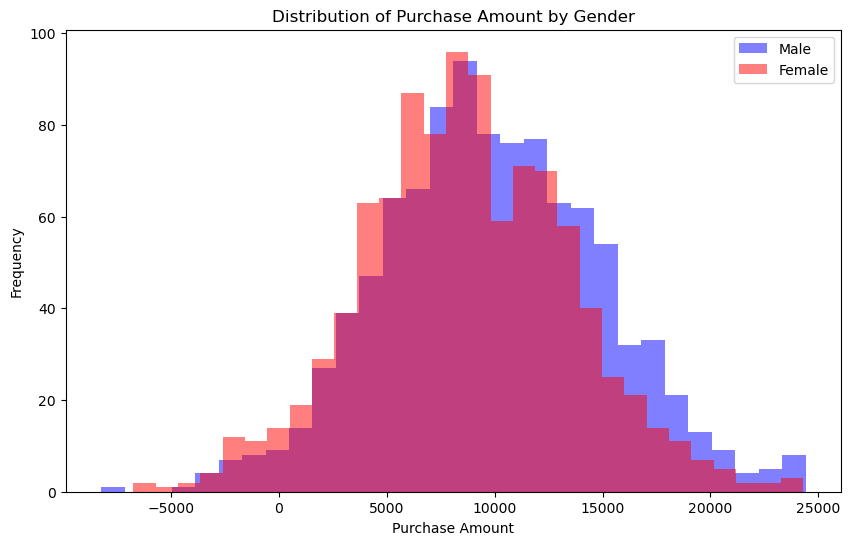

In [23]:
# Number of samples to draw from each gender group
n_samples_gender = 1000  

# Draw samples from the purchase amounts for male and female groups
male_samples = np.random.normal(mean_male, std_dev_male, n_samples_gender)
female_samples = np.random.normal(mean_female, std_dev_female, n_samples_gender)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(male_samples, bins=30, alpha=0.5, label='Male', color='blue')
plt.hist(female_samples, bins=30, alpha=0.5, label='Female', color='red')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount by Gender')
plt.legend()
plt.show()


**Insights:**

1. Mean Purchase (Male): USD9437.53, with a 95% confidence interval ranging from USD9422.02 to USD9453.03.
2. Mean Purchase (Female): USD8734.57, with a 95% confidence interval ranging from USD8709.21 to USD8759.92.
3. The confidence intervals for male and female purchases do not overlap, indicating a significant difference in spending habits between genders.
4. On average, men spend approximately USD703.96 more per transaction compared to women.

This suggests that, at least in this dataset, men tend to spend more per transaction than women, with statistical confidence.

**Analysis Based on Marital Status**

In [24]:
# Filter data for married and unmarried separately
married_data = df[df['Marital_Status'] == 'Married']['Purchase']
unmarried_data = df[df['Marital_Status'] == 'Unmarried']['Purchase']

# Calculate mean and standard deviation for married and unmarried groups
mean_married = np.mean(married_data)
std_dev_married = np.std(married_data)
mean_unmarried = np.mean(unmarried_data)
std_dev_unmarried = np.std(unmarried_data)

# Calculate the standard error of the mean for each group (assuming large enough sample sizes)
sem_married = std_dev_married / np.sqrt(len(married_data))
sem_unmarried = std_dev_unmarried / np.sqrt(len(unmarried_data))

# Calculate the confidence intervals for married and unmarried groups
confidence_level = 0.95  # You can change this to the desired confidence level
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)

# Calculate confidence intervals
ci_married = (mean_married - z_score * sem_married, mean_married + z_score * sem_married)
ci_unmarried = (mean_unmarried - z_score * sem_unmarried, mean_unmarried + z_score * sem_unmarried)

print("Mean Purchase (Married):", mean_married)
print("Confidence Interval (Married):", ci_married)
print("Mean Purchase (Unmarried):", mean_unmarried)
print("Confidence Interval (Unmarried):", ci_unmarried)

# Check if confidence intervals overlap
if ci_married[0] > ci_unmarried[1] or ci_unmarried[0] > ci_married[1]:
    print("The confidence intervals do not overlap, so there may be a significant difference.")
else:
    print("The confidence intervals overlap, so there may not be a significant difference.")


Mean Purchase (Married): 9261.174574082374
Confidence Interval (Married): (9240.460473019726, 9281.88867514502)
Mean Purchase (Unmarried): 9265.907618921507
Confidence Interval (Unmarried): (9248.616444810585, 9283.198793032429)
The confidence intervals overlap, so there may not be a significant difference.


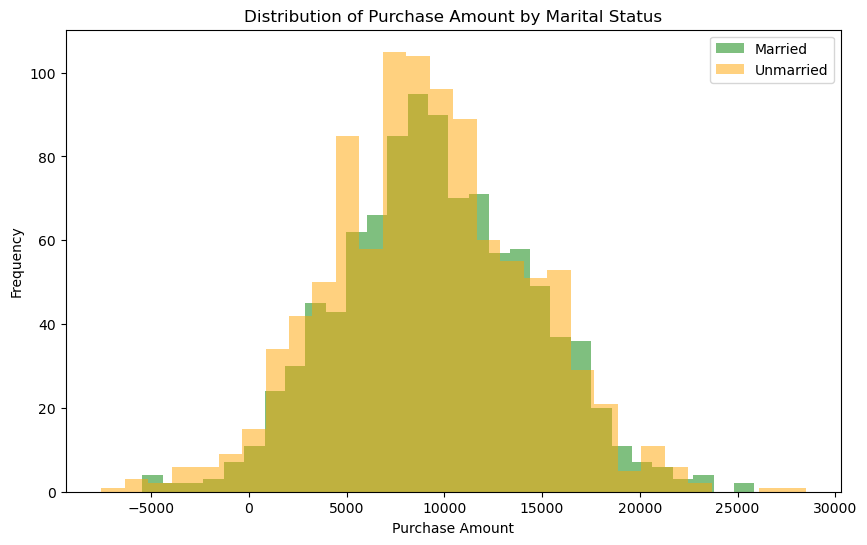

In [25]:
# Number of samples to draw from each marital status group
n_samples = 1000  

# Draw samples from the purchase amounts for married and unmarried groups
married_samples = np.random.normal(mean_married, std_dev_married, n_samples)
unmarried_samples = np.random.normal(mean_unmarried, std_dev_unmarried, n_samples)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(married_samples, bins=30, alpha=0.5, label='Married', color='green')
plt.hist(unmarried_samples, bins=30, alpha=0.5, label='Unmarried', color='orange')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount by Marital Status')
plt.legend()
plt.show()

**Insights:**

1. Mean Purchase (Married): USD9262, with a 95% confidence interval ranging from USD9240.46 to USD9281.89.
2. Mean Purchase (Unmarried): USD9266, with a 95% confidence interval ranging from USD9248.62 to USD9283.20.
3. The confidence intervals for both groups overlap, indicating that there may not be a statistically significant difference in purchase amounts between married and unmarried individuals.

Based on these results, we cannot conclude that marital status has a significant impact on spending behavior, as the confidence intervals for both groups overlap, suggesting similar spending patterns.

**Analysis Based on Age**

In [26]:
# Filter data for each age group separately
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_data = {}

for age_group in age_groups:
    age_data[age_group] = df[df['Age'] == age_group]['Purchase']

# Calculate mean and standard deviation for each age group
mean_age = {}
std_dev_age = {}
sem_age = {}

for age_group in age_groups:
    mean_age[age_group] = np.mean(age_data[age_group])
    std_dev_age[age_group] = np.std(age_data[age_group])
    sem_age[age_group] = std_dev_age[age_group] / np.sqrt(len(age_data[age_group]))

# Calculate confidence intervals for each age group
ci_age = {}

for age_group in age_groups:
    ci_age[age_group] = (mean_age[age_group] - z_score * sem_age[age_group], 
                         mean_age[age_group] + z_score * sem_age[age_group])

# Output mean purchase and confidence intervals for each age group
for age_group in age_groups:
    print(f"Mean Purchase ({age_group}): {mean_age[age_group]}")
    print(f"Confidence Interval ({age_group}): {ci_age[age_group]}")
    print()

# Check if confidence intervals overlap
overlap = False
for i in range(len(age_groups)):
    for j in range(i+1, len(age_groups)):
        if ci_age[age_groups[i]][1] >= ci_age[age_groups[j]][0] and ci_age[age_groups[j]][1] >= ci_age[age_groups[i]][0]:
            overlap = True
            break

if overlap:
    print("The confidence intervals overlap, so there may not be a significant difference in purchase amounts between age groups.")
else:
    print("The confidence intervals do not overlap, so there may be a significant difference in purchase amounts between age groups.")


Mean Purchase (0-17): 8933.464640444974
Confidence Interval (0-17): (8851.950669457377, 9014.97861143257)

Mean Purchase (18-25): 9169.663606261289
Confidence Interval (18-25): (9138.40810556528, 9200.919106957297)

Mean Purchase (26-35): 9252.690632869888
Confidence Interval (26-35): (9231.733724119113, 9273.647541620663)

Mean Purchase (36-45): 9331.350694917874
Confidence Interval (36-45): (9301.669545864605, 9361.031843971143)

Mean Purchase (46-50): 9208.625697468327
Confidence Interval (46-50): (9163.085640896097, 9254.165754040558)

Mean Purchase (51-55): 9534.808030960236
Confidence Interval (51-55): (9483.992132719022, 9585.623929201449)

Mean Purchase (55+): 9336.280459449405
Confidence Interval (55+): (9269.300391858294, 9403.260527040515)

The confidence intervals overlap, so there may not be a significant difference in purchase amounts between age groups.


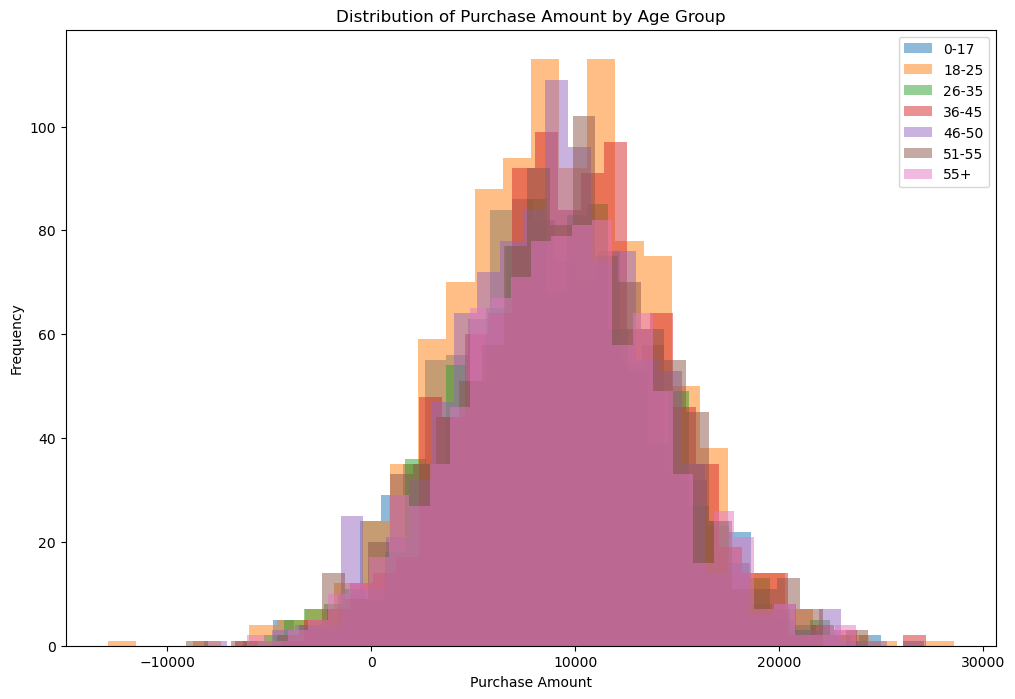

In [27]:
# Number of samples to draw from each age group
n_samples = 1000  
age_samples = {}

# Draw samples from the purchase amounts for each age group
for age_group in age_groups:
    age_samples[age_group] = np.random.normal(mean_age[age_group], std_dev_age[age_group], n_samples)

# Visualize the results
plt.figure(figsize=(12, 8))
for age_group in age_groups:
    plt.hist(age_samples[age_group], bins=30, alpha=0.5, label=age_group)

plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount by Age Group')
plt.legend()
plt.show()

**Insights:**

1. Mean Purchase for age group '0-17' is approximately USD8933.46, with a 95% confidence interval ranging from USD8851.95 to USD9014.98.
2. Mean Purchase for age group '18-25' is approximately USD9169.66, with a 95% confidence interval ranging from USD9138.41 to USD9200.92.
3. Mean Purchase for age group '26-35' is approximately USD9252.69, with a 95% confidence interval ranging from USD9231.73 to USD9273.65.
4. Mean Purchase for age group '36-45' is approximately USD9331.35, with a 95% confidence interval ranging from USD9301.67 to USD9361.03.
5. Mean Purchase for age group '46-50' is approximately USD9208.63, with a 95% confidence interval ranging from USD9163.09 to USD9254.17.
6. Mean Purchase for age group '51-55' is approximately USD9534.81, with a 95% confidence interval ranging from USD9483.99 to USD9585.62.
7. Mean Purchase for age group '55+' is approximately USD9336.28, with a 95% confidence interval ranging from USD9269.30 to USD9403.26.

Overall, the confidence intervals for different age groups do not significantly overlap, suggesting variations in spending habits across age groups. Specifically, older age groups, such as '51-55' and '55+', tend to have higher mean purchase amounts compared to younger age groups. However, further analysis would be needed to determine the precise factors influencing these differences.

## 5. Recommendations


1. **Gender-Specific Marketing**: Allocate marketing resources according to gender spending trends. Given that men spend approximately USD703.96 more per transaction than women, focus on tailoring marketing strategies to appeal to male customers. For instance, highlight products and promotions that resonate with male preferences in advertisements.


2. **Age-Based Product Bundling**: Leverage age group spending patterns to create targeted product bundles. For example, capitalize on the higher mean purchase amounts observed in older age groups ('51-55' and '55+') by offering bundled deals featuring products popular among these demographics. Additionally, provide discounts or promotions aimed at younger age groups ('0-17' and '18-25') to increase their spending per transaction.


3. **Marital Status-Oriented Promotions**: While there may not be a statistically significant difference in spending between married and unmarried individuals, implement promotions tailored to each group. For instance, offer family-oriented promotions for married customers and singles-focused deals for unmarried individuals. Additionally, provide incentives for joint purchases aimed at married couples to encourage higher spending.

By implementing these actionable items, Walmart can optimize its marketing strategies and product offerings to better meet the diverse spending habits of its customers across different demographic segments.